In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /content/Data/cats_and_dogs_filtered.zip

--2024-01-30 14:59:53--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.201.207, 74.125.202.207, 74.125.69.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.201.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/Data/cats_and_dogs_filtered.zip’

/content/Data/cats_ 100%[===================>]  65.43M   210MB/s    in 0.3s    

2024-01-30 14:59:54 (210 MB/s) - ‘/content/Data/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Unzipping the file
local_zip = '/content/Data/cats_and_dogs_filtered.zip'
zipref = zipfile.ZipFile(local_zip)
zipref.extractall('/content/Data')

In [ ]:
os.listdir('/content/Data/cats_and_dogs_filtered')

['validation', 'train', 'vectorize.py']

In [ ]:
print(os.listdir('/content/Data/cats_and_dogs_filtered/train'))
print(os.listdir('/content/Data/cats_and_dogs_filtered/validation'))

['cats', 'dogs']
['cats', 'dogs']


In [ ]:
base_dir = '/content/Data/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
val_cats_dir = os.path.join(val_dir, 'cats')
val_dogs_dir = os.path.join(val_dir, 'dogs')

In [ ]:
print('Number of training cat images   : ', len(os.listdir(train_cats_dir)))
print('Number of training dog images   : ', len(os.listdir(train_dogs_dir)))
print('Number of validation cat images : ', len(os.listdir(val_cats_dir)))
print('Number of validation dog images : ', len(os.listdir(val_dogs_dir)))

Number of training cat images   :  1000
Number of training dog images   :  1000
Number of validation cat images :  500
Number of validation dog images :  500


In [ ]:
print(os.listdir(train_cats_dir)[:5])
print(os.listdir(train_dogs_dir)[:5])
print(os.listdir(val_cats_dir)[:5])
print(os.listdir(val_dogs_dir)[:5])

['cat.793.jpg', 'cat.885.jpg', 'cat.343.jpg', 'cat.974.jpg', 'cat.232.jpg']
['dog.470.jpg', 'dog.286.jpg', 'dog.925.jpg', 'dog.923.jpg', 'dog.317.jpg']
['cat.2029.jpg', 'cat.2069.jpg', 'cat.2468.jpg', 'cat.2412.jpg', 'cat.2114.jpg']
['dog.2422.jpg', 'dog.2006.jpg', 'dog.2122.jpg', 'dog.2303.jpg', 'dog.2432.jpg']


(-0.5, 499.5, 373.5, -0.5)

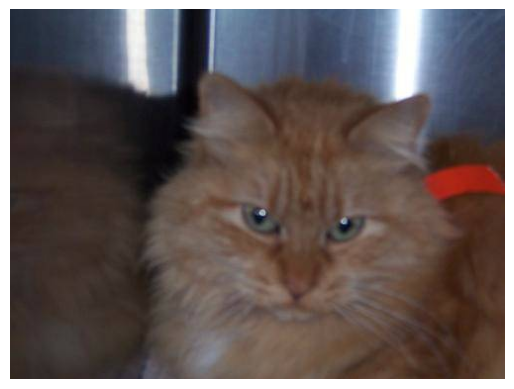

In [ ]:
# Accessing and visualizing a cat image
cat_image_path = os.path.join(train_cats_dir, 'cat.118.jpg')
cat_image = mpimg.imread(cat_image_path)
# cat_image.shape
plt.imshow(cat_image)
plt.axis('off')

(-0.5, 313.5, 306.5, -0.5)

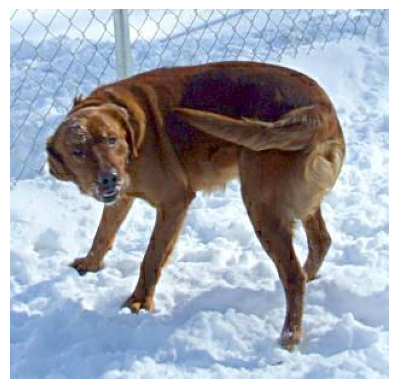

In [ ]:
# Accessing and visualizing a dog image
dog_image_path = os.path.join(train_dogs_dir, 'dog.420.jpg')
dog_image = mpimg.imread(dog_image_path)
# dog_image.shape
plt.imshow(dog_image)
plt.axis('off')

In [ ]:
cat_images = os.listdir(train_cats_dir)[:30]
dog_images = os.listdir(train_dogs_dir)[:30]

cat_image_paths = [os.path.join(train_cats_dir, image) for image in cat_images]
dog_image_paths = [os.path.join(train_dogs_dir, image) for image in dog_images]

image_paths = cat_image_paths + dog_image_paths
print(len(image_paths))

60


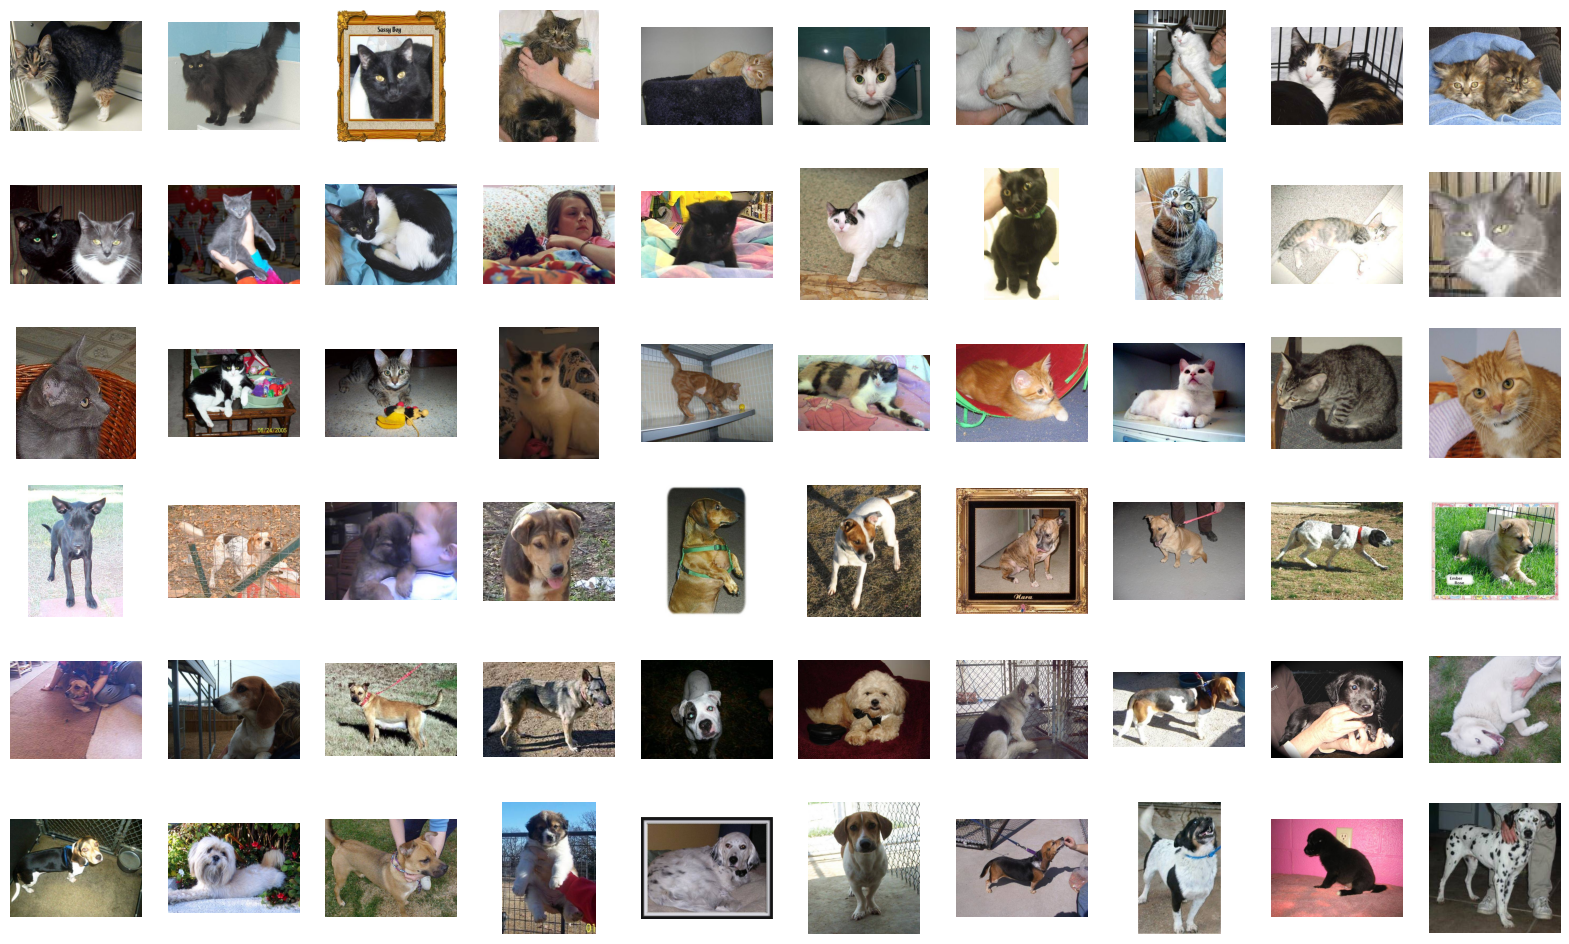

In [ ]:
plt.figure(figsize = (20,12))
for i in range(60):
  plt.subplot(6,10, i+1)
  plt.axis('off')
  image = mpimg.imread(image_paths[i])
  plt.imshow(image)

---
---

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 0.2,
    zoom_range = 0.2,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    vertical_flip = True,
    horizontal_flip = True
)

# Flow from directory is used when the data is on secondary storage
train_generator = train_datagen.flow_from_directory(
      train_dir,
      batch_size = 40,
      class_mode = 'binary',
      target_size = (150,150)
)

Found 2000 images belonging to 2 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale = 1/255)
val_generator =  val_datagen.flow_from_directory(
      val_dir,
      batch_size = 40,
      class_mode = 'binary',
      target_size = (150, 150)
)

Found 1000 images belonging to 2 classes.


---
---

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2024-01-30 15:00:06--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.201.207, 74.125.202.207, 74.125.69.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.201.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   122MB/s    in 0.7s    

2024-01-30 15:00:06 (122 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# InceptionV3 model
pre_trained_model = InceptionV3(
    input_shape = (150,150,3),
    include_top = False,
    weights = None
)
# Loading the weights
pre_trained_model.load_weights(local_weights_file)

In [ ]:
# Setting the trainable attribute for layers to False as we have used pre trained weights therefore these layers should not be trained
for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalizati

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('Last Layer Output_shape : ', last_layer.output_shape)
last_output = last_layer.output

Last Layer Output_shape :  (None, 7, 7, 768)


In [ ]:
x = Flatten()(last_output)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation = 'sigmoid')(x)

final_model = Model(pre_trained_model.input, x)

In [ ]:
final_model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate = 0.001),
              metrics = ['accuracy'])

In [ ]:
history = final_model.fit(
    train_generator,
    validation_data = (val_generator),
    epochs = 40,
    verbose = 1
)

Epoch 1/40
50/50 [==============================] - 24s 321ms/step - loss: 2.0484 - accuracy: 0.7505 - val_loss: 0.1129 - val_accuracy: 0.9590
Epoch 2/40
50/50 [==============================] - 15s 303ms/step - loss: 0.3278 - accuracy: 0.8695 - val_loss: 0.3591 - val_accuracy: 0.8670
Epoch 3/40
50/50 [==============================] - 16s 320ms/step - loss: 0.2822 - accuracy: 0.8880 - val_loss: 0.1186 - val_accuracy: 0.9530
Epoch 4/40
50/50 [==============================] - 16s 317ms/step - loss: 0.2436 - accuracy: 0.9055 - val_loss: 0.1058 - val_accuracy: 0.9510
Epoch 5/40
50/50 [==============================] - 17s 332ms/step - loss: 0.2382 - accuracy: 0.9030 - val_loss: 0.1606 - val_accuracy: 0.9370
Epoch 6/40
50/50 [==============================] - 16s 327ms/step - loss: 0.2228 - accuracy: 0.9170 - val_loss: 0.1085 - val_accuracy: 0.9560
Epoch 7/40
50/50 [==============================] - 15s 308ms/step - loss: 0.2099 - accuracy: 0.9155 - val_loss: 0.0957 - val_accuracy: 0.9610

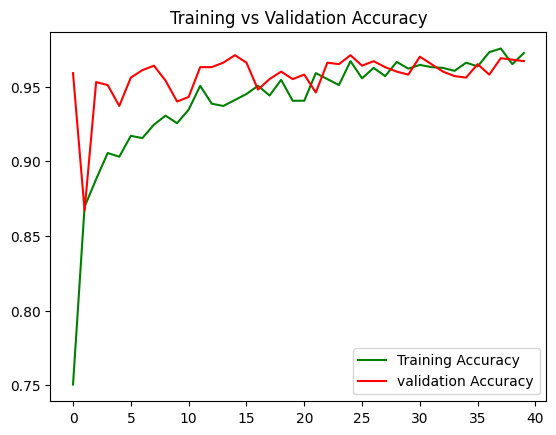

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure()
plt.plot(train_acc , color = 'green', label = 'Training Accuracy')
plt.plot(val_acc , color = 'red', label = 'validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

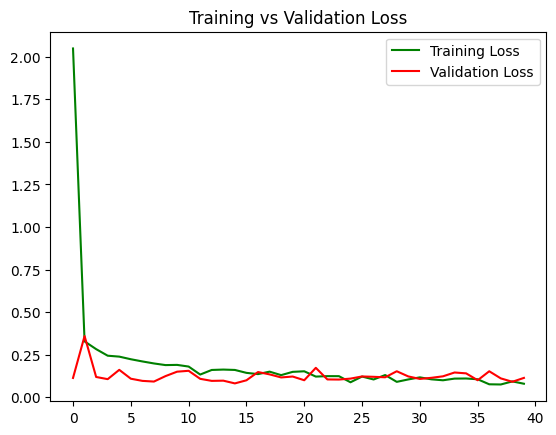

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(train_loss , color = 'green', label = 'Training Loss')
plt.plot(val_loss , color = 'red', label = 'Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()

In [ ]:
print(os.listdir(train_cats_dir)[:10])
print(os.listdir(train_dogs_dir)[:10])

['cat.793.jpg', 'cat.885.jpg', 'cat.343.jpg', 'cat.974.jpg', 'cat.232.jpg', 'cat.403.jpg', 'cat.97.jpg', 'cat.25.jpg', 'cat.672.jpg', 'cat.900.jpg']
['dog.470.jpg', 'dog.286.jpg', 'dog.925.jpg', 'dog.923.jpg', 'dog.317.jpg', 'dog.890.jpg', 'dog.98.jpg', 'dog.855.jpg', 'dog.452.jpg', 'dog.288.jpg']


(-0.5, 149.5, 149.5, -0.5)

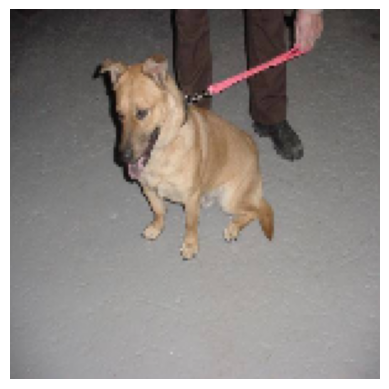

In [ ]:
image_path = os.path.join(train_dogs_dir, 'dog.855.jpg')
image = mpimg.imread(image_path)
image = cv2.resize(image, (150,150))
plt.imshow(image)
plt.axis('off')

In [ ]:
final_model.predict(image.reshape(1,150,150,3))

1/1 [==============================] - 0s 23ms/step


array([[0.]], dtype=float32)

In [ ]:
def cat_or_dog(image_path):
  image = mpimg.imread(image_path)
  image = cv2.resize(image, (150,150))
  image = image.reshape(1,150,150,3)
  plt.imshow(image)
  pred = final_model.predict(image)[0][0]

  if pred < 0.5:
    print('This is a Cat')
  else:
    print('This is a Dog')

TypeError: Invalid shape (1, 150, 150, 3) for image data

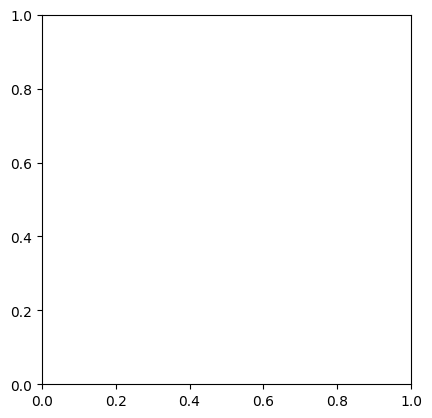

In [ ]:
image_path = os.path.join(train_dogs_dir, 'dog.890.jpg')
cat_or_dog(image_path)